In [1]:
import pandas as pd;
%matplotlib inline
import glob;
import numpy as np
import re;
import matplotlib.pyplot as plt

In [2]:
def parse_fileName(fileName):
    name=fileName.split("/")[-1]
    fields=name.split("_")
    var=fields[0]
    ecm=float(fields[1][1::])
    delta=float(fields[2][1::])
    alpha=float(fields[3][1::])
    pdfSet=fields[4][0:-4]
    data=np.loadtxt(fileName)
    return {'var': var, 'ecm': ecm, 'delta': delta,'alpha': alpha,'pdf':pdfSet,'data':data}
    
    

In [3]:
def create_data():
    return pd.DataFrame(columns=['var','ecm','delta','alpha','pdf','data'])

In [4]:
def load_data(data, fileName):
    row=len(data.index)
    di=parse_fileName(fileName)
    for key in di.keys():
        data.loc[row,key]=di[key] 

In [5]:
def select_data(data, di, othdi={}):
    di.update(othdi)
    return data[(data[list(di)] == pd.Series(di)).all(axis=1)]


In [14]:
def load_all_data(path):
    data=create_data()
    for file in glob.glob(path+'*.hst'):
        load_data(data,file)
    return data

In [15]:
def get_xy_data(data,crit):
    return list(select_data(data,crit)['data'])[0]

In [35]:
data=load_all_data('/Users/luchinsky/Dropbox/DskD/Work/pp_3/DirectPsi_v5/git_C++/directpsi/build/A/')
data

,var,ecm,delta,alpha,pdf,data
0,m,11,0.01,3,CT10,"[[3.149072, 0.3032531, 0.001522161], [3.243992..."
1,m,11,0.1,3,CT10,"[[3.149072, 0.3734967, 0.001721152], [3.243992..."
2,m,11,0.2,3,CT10,"[[3.149072, 0.804131, 0.004629133], [3.243992,..."
3,m,11,0.4,3,CT10,"[[3.149072, 64.49366, 1.989759], [3.243992, 1...."
4,pT2,11,0.01,3,CT10,"[[0.1265795, 2.220249, 0.006346562], [0.379738..."
5,pT2,11,0.1,3,CT10,"[[0.1265795, 2.291547, 0.006434], [0.3797386, ..."
6,pT2,11,0.2,3,CT10,"[[0.1265795, 2.594053, 0.006971906], [0.379738..."
7,pT2,11,0.4,3,CT10,"[[0.1265795, 27.26654, 0.7460919], [0.3797386,..."
8,xF,11,0.01,3,CT10,"[[-1.9, 0.01961791, 0.0002851338], [-1.7, 0.04..."
9,xF,11,0.1,3,CT10,"[[-1.9, 0.02020591, 0.0002866095], [-1.7, 0.04..."


In [36]:
var='m'
delta001=0.01
delta02=0.2
delta01=0.1
delta04=0.4
tab001=get_xy_data(data,{'var':var,'delta':delta001})
tab01=get_xy_data(data,{'var':var,'delta':delta01})
tab02=get_xy_data(data,{'var':var,'delta':delta02})
tab04=get_xy_data(data,{'var':var,'delta':delta04})

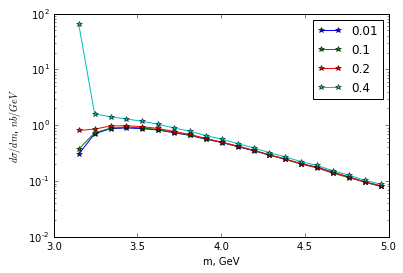

In [38]:
plt.plot(tab001[:,0],tab001[:,1],'*-',label=delta001)
plt.plot(tab01[:,0],tab01[:,1],'*-',label=delta01)
plt.plot(tab02[:,0],tab02[:,1],'*-',label=delta02)
plt.plot(tab04[:,0],tab04[:,1],'*-',label=delta04)
plt.yscale('log')
plt.legend()
plt.xlabel(var+', GeV'); plt.ylabel(r'$d\sigma/dm$, $nb/GeV$');


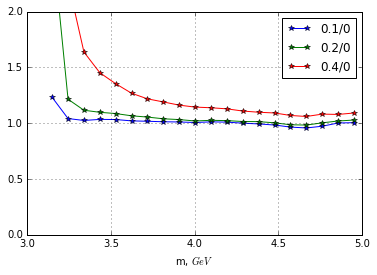

In [39]:
plt.plot(tab001[:,0],tab01[:,1]/tab001[:,1],'*-',label='0.1/0')
plt.plot(tab001[:,0],tab02[:,1]/tab001[:,1],'*-',label='0.2/0')
plt.plot(tab001[:,0],tab04[:,1]/tab001[:,1],'*-',label='0.4/0')
plt.ylim([0,2])
plt.xlabel(var+', $GeV$')
plt.legend()
plt.grid()